## Coggle 30 Days of ML

### Structured data

#### Task1 Donwload & Read Data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
Train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('data/used_car_testA_20200313.csv', sep=' ')

In [3]:
print("Train_data shape:", Train_data.shape)
print("Test_data shape:", Test_data.shape)

Train_data shape: (150000, 31)
Test_data shape: (50000, 30)


#### Task2 
* 使用Pandas对比赛数据集进行分析分析
    * 每个字段的取值、范围和类型
    * 结合比赛页面中具体字段的含义，对字段的取值分布进行分析
* 计算特征字段与标签的相关性
* 选择特征字段中与标签强相关的3个字段，绘制其余标签的分布关系图

In [4]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [6]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [7]:
cols = list(Train_data.columns)
cols

['SaleID',
 'name',
 'regDate',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'creatDate',
 'price',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [8]:
# 类别特征
cate_cols = ['SaleID', 'name', 'model', 'brand', 'bodyType', 
             'fuelType','gearbox', 'power', 'notRepairedDamage', 
             'regionCode','seller', 'offerType']

In [9]:
# 数值特征
num_cols = [x for x in cols if x not in cate_cols]
num_cols

['regDate',
 'kilometer',
 'creatDate',
 'price',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [10]:
# 类别特征分析
for col in cate_cols:
    print("{} has {} unique values".format(col, Train_data[col].nunique()))
    print(Train_data[col].value_counts())

SaleID has 150000 unique values
0        1
23262    1
56014    1
53967    1
10960    1
        ..
1322     1
3371     1
13612    1
15661    1
2047     1
Name: SaleID, Length: 150000, dtype: int64
name has 99662 unique values
387       282
708       282
55        280
1541      263
203       233
         ... 
26403       1
28450       1
32544       1
102174      1
184730      1
Name: name, Length: 99662, dtype: int64
model has 248 unique values
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
242.0        2
209.0        2
245.0        2
240.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand has 40 unique values
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      64

In [11]:
# 数值特征分析
num_df = Train_data[num_cols]
num_df.describe()

,regDate,kilometer,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,1.500000e+05,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.003417e+07,12.597160,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,5.364988e+04,3.919576,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,1.991000e+07,0.500000,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,1.999091e+07,12.500000,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,2.003091e+07,15.000000,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,2.007111e+07,15.000000,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,2.015121e+07,15.000000,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [12]:
# 相关性分析
target_numeric = Train_data[num_cols]
correlation = target_numeric.corr()
print(correlation['price'].sort_values(ascending=False), '\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
regDate      0.611959
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
creatDate    0.002955
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [14]:
# 选择特征字段中与标签强相关的3个字段，绘制其余标签的分布关系图
tmp_cols = ['price', 'v_12', 'v_8', 'v_0']
tmp_target_numeric = Train_data[tmp_cols]
tmp_correlation = tmp_target_numeric.corr()
print(tmp_correlation['price'].sort_values(ascending=False), '\n')

price    1.000000
v_12     0.692823
v_8      0.685798
v_0      0.628397
Name: price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

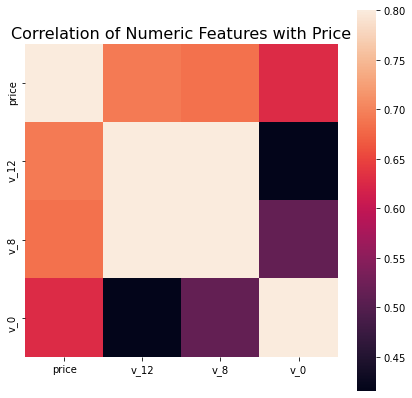

In [15]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(tmp_correlation, square = True,  vmax=0.8)

#### 任务3：对标签进行数据分析，并使用 log 进行转换
* 使用Pandas对标签字段进行数据分析
* 使用 log 对标签字段进行转换

In [16]:
target_df = pd.DataFrame()
target_df['price'] = Train_data['price']

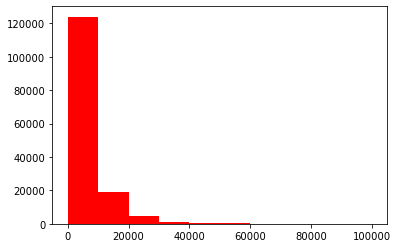

In [17]:
## 查看预测值的具体频数
plt.hist(target_df['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [18]:
target_df['price'].describe()

count    150000.000000
mean       5923.327333
std        7501.998477
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64

In [19]:
# 有无缺失值
target_df['price'].isnull().any()

False

In [20]:
import numpy as np

In [21]:
# log+1变换
target_df['price_log'] = np.log(target_df['price']+1)

In [22]:
target_df

,price,price_log
0,1850,7.523481
1,3600,8.188967
2,6222,8.736007
3,2400,7.783641
4,5200,8.556606
...,...,...
149995,5900,8.682877
149996,9500,9.159152
149997,7500,8.922792
149998,4999,8.517193


In [23]:
target_df['h'] = np.power(np.e, target_df['price_log'])-1

In [24]:
target_df

,price,price_log,h
0,1850,7.523481,1850.0
1,3600,8.188967,3600.0
2,6222,8.736007,6222.0
3,2400,7.783641,2400.0
4,5200,8.556606,5200.0
...,...,...,...
149995,5900,8.682877,5900.0
149996,9500,9.159152,9500.0
149997,7500,8.922792,7500.0
149998,4999,8.517193,4999.0


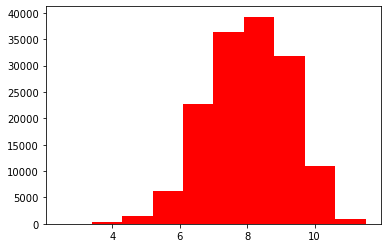

In [25]:
plt.hist(target_df['price_log'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [26]:
target_df['SaleID'] = Train_data[['SaleID']]

In [27]:
target_df.columns

Index(['price', 'price_log', 'h', 'SaleID'], dtype='object')

In [28]:
del Train_data['price']

#### 任务4：使用特征工程对比赛字段进行编码
* 对数据集中类别字段（取值空间大于2）的进行字段进行onehot操作
* 对日期特征提取年月日等信息

In [29]:
# 合并训练集与测试集字段构造特征
Train_data['train'] = 1
Test_data['train'] = 0
data = pd.concat([Train_data, Test_data], axis=0, ignore_index=True)
print(data.shape)

(200000, 31)


In [30]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14', 'train'],
      dtype='object')

In [31]:
# method 1 
from sklearn.preprocessing import OneHotEncoder

In [32]:
oh_cols = ['model','brand','bodyType','fuelType','notRepairedDamage']
enc = OneHotEncoder(handle_unknown='ignore', dtype=int)
enc.fit(data[oh_cols])
oh_df = pd.DataFrame(enc.transform(data[oh_cols]).toarray(), columns=enc.get_feature_names(), dtype=int)

In [33]:
oh_df.shape

(200000, 309)

In [34]:
data1 = data.drop(oh_cols, axis=1)
data1 = pd.concat([data1, oh_df], axis=1)
print(data1.shape)

(200000, 335)


In [35]:
# method 2
data2 = pd.get_dummies(data, columns=oh_cols)
print(data2.shape)
print(data2.columns)

(200000, 332)
Index(['SaleID', 'name', 'regDate', 'gearbox', 'power', 'kilometer',
       'regionCode', 'seller', 'offerType', 'creatDate',
       ...
       'fuelType_0.0', 'fuelType_1.0', 'fuelType_2.0', 'fuelType_3.0',
       'fuelType_4.0', 'fuelType_5.0', 'fuelType_6.0', 'notRepairedDamage_-',
       'notRepairedDamage_0.0', 'notRepairedDamage_1.0'],
      dtype='object', length=332)


* 方法一和方法二的差别在于OneHotEncoder对nan数据也进行了编码

In [36]:
# 时间特征处理
data1['regDate'] = pd.to_datetime(data1['regDate'], errors='coerce', format='%Y%m%d')
data1['creatDate'] = pd.to_datetime(data1['creatDate'], errors='coerce', format='%Y%m%d')

In [37]:
data1['creatDate_daysinmon'] = data1['creatDate'].dt.daysinmonth
data1['creatDate_dayofweek'] = data1['creatDate'].dt.dayofweek
data1['creatDate_dayofyear'] = data1['creatDate'].dt.dayofyear
data1['creatDate_weekofyear'] = data1['creatDate'].dt.weekofyear
data1['creatDate_monstart_end'] = (data1['creatDate'].dt.is_month_start|data1['creatDate'].dt.is_month_end).replace({False:0, True:1})

In [38]:
data1['regDate_daysinmon'] = data1['regDate'].dt.daysinmonth
data1['regDate_dayofweek'] = data1['regDate'].dt.dayofweek
data1['regDate_dayofyear'] = data1['regDate'].dt.dayofyear
data1['regDate_weekofyear'] = data1['regDate'].dt.weekofyear
data1['regDate_monstart_end'] = (data1['regDate'].dt.is_month_start|data1['regDate'].dt.is_month_end).replace({False:0, True:1})

In [39]:
data1['creatDate_regDate_diff'] = (data1['creatDate'] - data1['regDate']).fillna(pd.Timedelta(seconds=0)).dt.days.astype(int)

In [40]:
del data1['regDate']
del data1['creatDate']

In [41]:
print(data1.shape)

(200000, 344)


In [42]:
data1.columns

Index(['SaleID', 'name', 'gearbox', 'power', 'kilometer', 'regionCode',
       'seller', 'offerType', 'v_0', 'v_1',
       ...
       'creatDate_dayofweek', 'creatDate_dayofyear', 'creatDate_weekofyear',
       'creatDate_monstart_end', 'regDate_daysinmon', 'regDate_dayofweek',
       'regDate_dayofyear', 'regDate_weekofyear', 'regDate_monstart_end',
       'creatDate_regDate_diff'],
      dtype='object', length=344)

#### 任务5：使用 Sklearn 中基础树模型完成训练和预测

In [52]:
# 五折交叉验证的数据划分方法（KFold）
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import time

In [44]:
data1 = data1.fillna(-1)

In [45]:
train = pd.merge(data1[data1['train']==1], target_df, on='SaleID', how='left')

In [46]:
train_x = train[data1.columns].drop('SaleID', axis=1)
print(train_x.shape)

(150000, 343)


In [47]:
test = data1[data1['train']==0].drop('SaleID', axis=1)
print(test.shape)

(50000, 343)


In [48]:
# 使用sklearn中随机森林模型
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [49]:
kf = KFold(n_splits=5)
cnt = 0
scores = []
scores_train = []
pred_test = []
regr = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=2021)

train_y = train['price_log']

for train_index, val_index in kf.split(train_x):
    cnt += 1  
    X_train, X_val = train_x.iloc[train_index].values, train_x.iloc[val_index].values  
    y_train, y_val = train_y[train_index], train_y[val_index]
#     print("X_train shape: ", X_train.shape)
#     print("X_val shape:", y_train.shape)
    regr.fit(X_train, y_train)
    pred_train = regr.predict(X_train)
    pred_val = regr.predict(X_val)
    
    pred_test.append(regr.predict(test).reshape(-1,).tolist())
  
    score_train = mean_absolute_error(y_train, pred_train)
    print("{} train score:{}".format(cnt, score_train))
    scores_train.append(score_train)
    
    score_val = mean_absolute_error(y_val, pred_val)
    print("{} val score:{}".format(cnt, score_val))
    scores.append(score_val)
    
print('Train mae:', np.mean(score_train))
print('val mae:', np.mean(scores))

1 train score:0.05893001523097096
1 val score:0.14556054097631357
2 train score:0.058739897922304316
2 val score:0.14552089475273952
3 train score:0.05860049685596526
3 val score:0.14691564992880107
4 train score:0.05886320112970154
4 val score:0.14422757585115567
5 train score:0.0585562679722614
5 val score:0.1463497863431485
Train mae: 0.0585562679722614
val mae: 0.14571488957043166


In [53]:
# 对标签price按照大小划分成10等分，然后使用StratifiedKFold进行划分
train['price_bin'] = pd.cut(train['price'], 10,labels=False)
skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(train_x, train['price_bin']):    
    X_train, X_val = train_x.iloc[train_index].values, train_x.iloc[val_index].values     
    y_train, y_val = train_y[train_index], train_y[val_index]

#### 任务6：成功将树模型的预测结果文件提交到天池
* 使用StratifiedKFold配合随机森林完成模型的训练和预测
* 在每折记录下模型对验证集和测试集的预测结果
* 将多折测试集结果进行求均值，并写入csv提交到天池

In [54]:
skf = StratifiedKFold(n_splits=5)
regr = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=2021)

cnt = 0
scores = []
scores_train = []
pred_test = []
train_y = train['price']

for train_index, val_index in skf.split(train_x, train_y):    
    
#     print("TRAIN:", train_index, "val:", val_index)    
    X_train, X_val = train_x.iloc[train_index].values, train_x.iloc[val_index].values     
    y_train, y_val = train_y[train_index], train_y[val_index]
#     print("X_train shape: ", X_train.shape)
#     print("X_val shape:", X_val.shape)
    regr.fit(X_train, y_train)
    pred_train = regr.predict(X_train)
    pred_val = regr.predict(X_val)
    pred_test.append(regr.predict(test.values).reshape(-1,).tolist())

    score_train = mean_absolute_error(y_train, pred_train)
    print("{} train score:{}".format(cnt, score_train))
    scores_train.append(score_train)
    
    score_val = mean_absolute_error(y_val, pred_val)
    print("{} val score:{}".format(cnt, score_val))
    scores.append(score_val)
    
    cnt += 1
    
print('Train mae:', np.mean(score_train))
print('val mae:', np.mean(scores))

0 train score:273.8098483333334
0 val score:678.8501833333333
1 train score:274.1433641666667
1 val score:676.5069611111112
2 train score:275.01094166666667
2 val score:666.6310594444445
3 train score:276.2332008333334
3 val score:671.10893
4 train score:274.94583111111103
4 val score:677.6106644444444
Train mae: 274.94583111111103
val mae: 674.1415596666667


In [55]:
sub = np.round(np.mean(pred_test, axis=0),2)

sub_df = pd.DataFrame()
sub_df['SaleID'] = data1[data1['train']==0]['SaleID']
sub_df['price'] = sub

res_name = 'RF_submit_'+str(time.time())+".csv"
sub_df.to_csv('./submit/'+res_name, index=False)

#### 任务7：使用 XGBoost 模型完成训练和预测
* 学会XGBoost模型的基础使用
* 学会XGBoost模型的基础参数理解
* 学会XGBoost模型的保存和加载

In [56]:
import xgboost as xgb

In [57]:
model_xgb = xgb.XGBRFRegressor(
    n_estimators=120, 
    learning_rate=0.1,
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.9,
    max_depth=7
)

In [58]:
model_xgb.fit(train_x.loc[:1000-1,].values, train['price_log'][:1000,])

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=0.9, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=7, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=120, n_jobs=8,
               num_parallel_tree=120, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
tmp_pred = model_xgb.predict(test.values)

In [60]:
# 模型保存和加载
import pickle

In [61]:
model_save_nm = "./model/"+"xgb_model_"+str(time.time())+".dat"
print("model save name:", model_save_nm)
pickle.dump(model_xgb, open(model_save_nm, "wb"))

model save name: ./model/xgb_model_1633507036.5179465.dat


In [62]:
loaded_model = pickle.load(open(model_save_nm, "rb"))

loaded_model.predict(train_x.loc[:1000-1,].values)

array([1.1854234 , 1.2403396 , 1.3298208 , 1.2297554 , 1.3171523 ,
       1.3525314 , 1.2331194 , 1.1490816 , 1.2678937 , 1.0891201 ,
       1.2493066 , 1.3130935 , 1.1877002 , 1.2724652 , 1.2806468 ,
       1.2408042 , 1.3950853 , 1.2846724 , 1.110128  , 1.1731206 ,
       1.1360351 , 1.2463812 , 1.0269262 , 1.1218877 , 1.3581873 ,
       1.2566496 , 1.2456666 , 1.2390637 , 1.2893225 , 1.2446228 ,
       1.2428685 , 1.4037493 , 1.1619996 , 1.4076667 , 1.4229563 ,
       1.3182441 , 1.3039206 , 1.3290886 , 1.3504202 , 1.336564  ,
       1.2370266 , 1.2869    , 1.1791553 , 1.2869706 , 1.1675361 ,
       1.0999702 , 1.3734515 , 1.3019265 , 1.3511337 , 1.349859  ,
       1.356772  , 1.0549341 , 1.3576586 , 1.0808276 , 1.1355546 ,
       1.2332433 , 1.3550606 , 1.2743516 , 1.2426305 , 1.2437046 ,
       1.379672  , 1.2383113 , 0.9578109 , 1.1961403 , 1.1623144 ,
       1.2469127 , 1.1479902 , 1.3258451 , 0.99546695, 1.2176344 ,
       1.0863208 , 1.1551079 , 1.1323296 , 1.2794783 , 1.40800

#### 任务8：成功将 XGBoost 的预测结果文件提交到天池
* 使用StratifiedKFold配合XGBoost完成模型的训练和预测
* 在每折记录下模型对验证集和测试集的预测结果
* 将多折测试集结果进行求均值，并写入csv提交到天池

In [63]:
skf = StratifiedKFold(n_splits=5)

cnt = 0
scores = []
scores_train = []
pred_test = []
train_y = train['price']

for train_index, val_index in skf.split(train_x, train_y):   
    
    cnt += 1 
    X_train, X_val = train_x.iloc[train_index].values, train_x.iloc[val_index].values     
    y_train, y_val = train_y[train_index], train_y[val_index]

    model_xgb.fit(X_train, y_train)
    
    pred_train = model_xgb.predict(X_train)
    pred_val = model_xgb.predict(X_val)
    
    pred_test.append(model_xgb.predict(test.values).reshape(-1,).tolist())

    score_train = mean_absolute_error(y_train, pred_train)
    print("{} train score:{}".format(cnt, score_train))
    scores_train.append(score_train)
    
    score_val = mean_absolute_error(y_val, pred_val)
    print("{} val score:{}".format(cnt, score_val))
    scores.append(score_val)
    
print('Train mae:', np.mean(score_train))
print('val mae:', np.mean(scores))

1 train score:5329.58431973079
1 val score:5336.875206981723
2 train score:5329.828708204683
2 val score:5333.528000154876
3 train score:5333.350929758723
3 val score:5321.765059968439
4 train score:5327.09992009937
4 val score:5345.446365399552
5 train score:5334.155382297118
5 val score:5318.775678134664
Train mae: 5334.155382297118
val mae: 5331.278062127851


In [64]:
sub = np.round(np.mean(pred_test, axis=0),2)

sub_df = pd.DataFrame()
sub_df['SaleID'] = data1[data1['train']==0]['SaleID']
sub_df['price'] = sub

res_name = 'xgb_submit_'+str(time.time())+".csv"
sub_df.to_csv('./submit/'+res_name, index=False)

In [65]:
## online result score:5441.9085

#### 任务9：使用 LightGBM 模型完成训练和预测
* 学会LightGBM模型的基础使用
* 学会LightGBM模型的基础参数理解
* 学会LightGBM模型的保存和加载

In [66]:
import lightgbm as lgb

In [67]:
lgb_train = lgb.Dataset(train_x, train['price']) # 将数据保存到LightGBM二进制文件将使加载更快
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)  # 创建验证数据

In [68]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'mae'},  # 评估函数 l1/mae
    'num_leaves': 31,   # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'device':'gpu', #使用gpu
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [69]:
# generate feature names
num_train, num_feature = train_x.shape

feature_name = ['feature_' + str(col) for col in range(num_feature)]

In [70]:
print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                feature_name=feature_name,
                valid_sets=lgb_train,  
                early_stopping_rounds=10
               ) # 训练数据需要参数列表和数据集

Start training...
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 5761
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 317
[LightGBM] [Info] Using GPU Device: GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 31 dense feature groups (4.58 MB) transferred to GPU in 0.003554 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 5923.327333
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 31 dense feature groups (3.67 MB) transferred to GPU in 0.002847 secs. 1 sparse feature groups
[1]	training's l1: 4765.06
Training until validation scores don't improve for 10 rounds
[2]	training's l1: 4548.93
[3]	training's l1: 4341.37
[4]	training's l1: 4146.84
[5]	training's l1: 3961.89
[LightGBM] [Info] Size of histogram bin ent

In [71]:
# 模型保存与加载
path = './model/'
save_model_nm = "lgb_model_"+str(time.time())+'.txt'
gbm.save_model(path+save_model_nm)


In [72]:
print(path+save_model_nm)

./model/lgb_model_1633507153.7816436.txt


In [73]:
gbm = lgb.Booster(model_file=path+save_model_nm)
tmp_pred = gbm.predict(test.values, num_iteration=gbm.best_iteration)

In [74]:
tmp_pred

array([21169.91144704,  3919.3190217 ,  6456.78185541, ...,
        6183.13048652,  7927.30057534,  5160.35404101])

#### 任务10：成功将 LightGBM 的预测结果文件提交到天池
* 使用StratifiedKFold配合LightGBM完成模型的训练和预测
* 在每折记录下模型对验证集和测试集的预测结果
* 将多折测试集结果进行求均值，并写入csv提交到天池

In [75]:
skf = StratifiedKFold(n_splits=5)

cnt = 0
scores = []
scores_train = []
pred_test = []
train_y = train['price']

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'mae'},  # 评估函数 l1/mae
#     'n_estimators':150,
    'num_leaves': 300,   # 叶子节点数
    'max_depth':7,
    'learning_rate': 0.1,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'device':'gpu', #使用gpu
#     'silent':True,
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}
#  max_depth=7, 
#  n_estimators=150, 
#  num_leaves=300
for train_index, val_index in skf.split(train_x, train_y):   
    
    cnt += 1 
    X_train, X_val = train_x.iloc[train_index].values, train_x.iloc[val_index].values     
    y_train, y_val = train_y[train_index], train_y[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_val = lgb.Dataset(X_val, y_val)
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2,
                feature_name=feature_name,
                valid_sets=lgb_val,  
                early_stopping_rounds=5
               ) 
    
    pred_train = gbm.predict(X_train)
    pred_val = gbm.predict(X_val)

    pred_test.append(gbm.predict(test.values).reshape(-1,).tolist())

    score_train = mean_absolute_error(y_train, pred_train)
    print("{} train score:{}".format(cnt, score_train))
    scores_train.append(score_train)
    
    score_val = mean_absolute_error(y_val, pred_val)
    print("{} val score:{}".format(cnt, score_val))
    scores.append(score_val)
    
print('Train mae:', np.mean(score_train))
print('val mae:', np.mean(scores))

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 5745
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 313
[LightGBM] [Info] Using GPU Device: GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 31 dense feature groups (3.66 MB) transferred to GPU in 0.002923 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 5922.060942
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 31 dense feature groups (2.93 MB) transferred to GPU in 0.002568 secs. 1 sparse feature groups
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l1: 4537.81
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l1: 411

In [76]:
sub = np.round(np.mean(pred_test, axis=0),2)

sub_df = pd.DataFrame()
sub_df['SaleID'] = data1[data1['train']==0]['SaleID']
sub_df['price'] = sub

res_name = 'lgb_submit_'+str(time.time())+".csv"
sub_df.to_csv('./submit/'+res_name, index=False)

In [77]:
#online result score:5630.4628

#### 任务11：对 XGBoost、LightGBM 模型进行调参
* 网格参数搜索、随机搜索参数、贝叶斯搜索参数
* 使用Optuna完成模型调参

In [ ]:
!pip install bayesian-optimization

In [91]:
import sklearn
# 网格搜索
from sklearn.model_selection import GridSearchCV
# 随机搜索参数
from sklearn.model_selection import RandomizedSearchCV
# 贝叶斯搜索参数
from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [96]:
# 网格搜索
lg = lgb.LGBMRegressor(silent=False)
# 候选参数
param_dist = {"max_depth": [4,5, 7],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [50, 100, 150]
             }
# 网格搜索
grid_search_lgb = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="neg_mean_absolute_error", verbose=1)
grid_search_lgb.fit(train_x,train['price'])
# 随机搜索参数
random_search_lgb = RandomizedSearchCV(lg, n_jobs=-1, param_distributions=param_dist, scoring="neg_mean_absolute_error", cv=5,  verbose=1)
random_search_lgb.fit(train_x,train['price'])
# grid_search.best_estimator_, grid_search.best_score_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5761
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 317
[LightGBM] [Info] Start training from score 5923.327333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(silent=False), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 5, 7],
                                        'n_estimators': [50, 100, 150],
                                        'num_leaves': [300, 900, 1200]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [97]:
grid_search_lgb.best_estimator_, grid_search_lgb.best_score_

(LGBMRegressor(max_depth=7, n_estimators=150, num_leaves=300, silent=False),
 -641.6712418116799)

In [98]:
random_search_lgb.best_estimator_, random_search_lgb.best_score_

(LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimators=150, num_leaves=900,
               silent=False),
 -658.4956476360721)

In [92]:
# 贝叶斯搜索
def rf_cv_lgb(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        lgb.LGBMRegressor(objective = 'regression_l1',
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=train_x, y=train['price'], verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val
rf_bo_lgb = BayesianOptimization(
    rf_cv_lgb,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)
rf_bo_lgb.maximize()

|   iter    |  target   | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------
|  1        | -729.5    |  40.85    |  86.89    |  31.0     |  0.6323   |
|  2        | -666.7    |  71.84    |  84.31    |  66.97    |  0.9374   |
|  3        | -831.9    |  81.21    |  3.649    |  12.31    |  0.989    |
|  4        | -747.5    |  17.28    |  9.202    |  25.35    |  0.9181   |
|  5        | -1.345e+0 |  77.21    |  12.23    |  2.209    |  0.9133   |
|  6        | -860.4    |  34.27    |  40.52    |  10.3     |  0.3192   |
|  7        | -748.7    |  69.87    |  10.51    |  25.2     |  0.4382   |
|  8        | -759.8    |  8.489    |  72.57    |  23.11    |  0.8514   |
|  9        | -662.4    |  19.74    |  43.52    |  71.89    |  0.3399   |
|  10       | -658.5    |  16.4     |  44.85    |  77.74    |  0.3966   |
|  11       | -664.6    |  71.14    |  84.06    |  68.44    |  0.3203   |
|  12       | -655.6    |  27.5     | 

In [ ]:
model_xgb = xgb.XGBRFRegressor(
        n_estimators=120, 
        learning_rate=0.1,
        gamma=0, 
        subsample=0.8,
        colsample_bytree=0.9,
        max_depth=7
)
param_dist = {"n_estimators":[50, 100, 150],
              "max_depth": [4,5, 7],
              "learning_rate" : [0.01,0.05,0.1]
             }
grid_search_xgb = GridSearchCV(model_xgb, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="neg_mean_absolute_error", verbose=1)
grid_search_xgb.fit(train_x,train['price'])

# 随机搜索参数
random_search_xgb = RandomizedSearchCV(model_xgb, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="neg_mean_absolute_error", verbose=1)
random_search_xgb.fit(train_x,train['price'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
print(grid_search_xgb.best_estimator_, grid_search_xgb.best_score_)
print(random_search_xgb.best_estimator_, random_search_xgb.best_score_)

In [ ]:
# 贝叶斯搜索
def rf_cv_xgb(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        xgb.XGBRFRegressor(
            n_estimators=120, 
            learning_rate=0.1,
            gamma=0, 
            subsample=0.8,
            colsample_bytree=0.9,
            max_depth=7
            ),
        X=train_x, y=train['price'], verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val
rf_bo_xgb = BayesianOptimization(
    rf_cv_lgb,
    {
    "n_estimators":[50, 100, 150],
    "max_depth": [4,5, 7],
     "learning_rate" : [0.01,0.05,0.1]
    }
)
print(rf_bo_xgb.maximize())

#### 任务12：使用交叉验证 + Stacking 过程完成模型集成
* 使用Stacking完成模型集成
* 将多折测试集结果进行求均值，并写入csv提交到天池

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [ ]:
X, X_test, y, y_test = train_test_split(train_x, train['price'], test_size=0.3, random_state=2021)

In [ ]:
stacking_train = np.zeros((X.shape[0], 1)) #
stacking_test = np.zeros((X_test.shape[0], 1))

In [ ]:
stacking_train

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'mae'},  # 评估函数 l1/mae
#     'n_estimators':150,
    'num_leaves': 300,   # 叶子节点数
    'max_depth':7,
    'learning_rate': 0.1,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'device':'gpu', #使用gpu
#     'silent':True,
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [ ]:
# 5折stacking
n_splits = 5
skf = StratifiedKFold(n_splits)

i = 0
# 训练lgb模型
stacking_test_j = np.zeros((X_predict.shape[0], n_splits))
for train_index, val_index in skf.split(X, y):
    
    X_train, X_val = X.iloc[train_index].values, X.iloc[val_index].values     
    y_train, y_val = y.iloc[train_index].values, y.iloc[val_index].values
    # 5-Fold交叉训练，使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_val = lgb.Dataset(X_val, y_val)
    gbm = lgb.train(params,
            lgb_train,
            num_boost_round=20,
            feature_name=feature_name,
            valid_sets=lgb_val,  
            early_stopping_rounds=5
           ) 

    y_submission = gbm.predict(X_val)
    stacking_train[val_index, 0] = y_submission # 保存子模型对交叉验证集的预测结果
    stacking_test_j[:, i] = gbm.predict(X_test) # 交叉子模型预测训练集
    i += 1


In [ ]:
# # 对于测试集，直接用这k个模型的预测值均值作为新的特征。
stacking_test = stacking_test_j.mean(1)
print("val mae score: %f" % mean_absolute_error(y_predict, stacking_test))

In [ ]:
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(stacking_train, y)
y_submission = clf.predict(dataset_blend_test)

In [ ]:
y_submission